In [1]:
# ============================================
# CELL 1: Import Libraries
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import librosa
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
current_dir = Path.cwd()
if current_dir.name == 'notebooks':
    PROJECT_ROOT = current_dir.parent
else:
    PROJECT_ROOT = current_dir
    
DATA_DIR = PROJECT_ROOT / 'Data'
AUDIO_DIR = DATA_DIR / 'genres_original'
RESULTS_DIR = PROJECT_ROOT / 'results' / 'figures'
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Setup complete!")
print(f"📁 Audio directory: {AUDIO_DIR}")

✅ Setup complete!
📁 Audio directory: /Users/erfanesfahanian/Desktop/audio pattern project/Data/genres_original


In [3]:
# ============================================
# CELL 2: Extract Features from a Single Audio File (FIXED)
# ============================================

# Load a sample audio file
sample_file = AUDIO_DIR / 'blues' / 'blues.00000.wav'
print(f"🎵 Extracting features from: {sample_file.name}")
print("="*60)

# Load audio
audio, sr = librosa.load(sample_file, duration=30)
print(f"✅ Audio loaded: {len(audio)} samples at {sr} Hz\n")

# Initialize feature dictionary
features = {}

# 1. MFCC (Mel-Frequency Cepstral Coefficients)
print("1️⃣ Extracting MFCCs...")
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
print(f"   Shape: {mfccs.shape} (20 coefficients × {mfccs.shape[1]} time frames)")
print(f"   What it captures: Timbre/texture of sound (like a 'fingerprint')")
for i in range(20):
    features[f'mfcc{i+1}_mean'] = np.mean(mfccs[i])
    features[f'mfcc{i+1}_var'] = np.var(mfccs[i])

# 2. Chroma (Pitch class)
print("\n2️⃣ Extracting Chroma features...")
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
print(f"   Shape: {chroma.shape} (12 pitch classes × {chroma.shape[1]} time frames)")
print(f"   What it captures: Musical notes (C, C#, D, D#, E, F, F#, G, G#, A, A#, B)")
features['chroma_stft_mean'] = np.mean(chroma)
features['chroma_stft_var'] = np.var(chroma)

# 3. Spectral Centroid (brightness)
print("\n3️⃣ Extracting Spectral Centroid...")
spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
print(f"   Shape: {spectral_centroid.shape}")
print(f"   What it captures: 'Brightness' of sound (where frequencies are concentrated)")
features['spectral_centroid_mean'] = np.mean(spectral_centroid)
features['spectral_centroid_var'] = np.var(spectral_centroid)

# 4. Spectral Rolloff
print("\n4️⃣ Extracting Spectral Rolloff...")
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
print(f"   Shape: {spectral_rolloff.shape}")
print(f"   What it captures: Frequency below which 85% of energy is concentrated")
features['rolloff_mean'] = np.mean(spectral_rolloff)
features['rolloff_var'] = np.var(spectral_rolloff)

# 5. Zero Crossing Rate
print("\n5️⃣ Extracting Zero Crossing Rate...")
zcr = librosa.feature.zero_crossing_rate(audio)
print(f"   Shape: {zcr.shape}")
print(f"   What it captures: Noisiness/percussion (how often signal crosses zero)")
features['zero_crossing_rate_mean'] = np.mean(zcr)
features['zero_crossing_rate_var'] = np.var(zcr)

# 6. RMS (Root Mean Square Energy)
print("\n6️⃣ Extracting RMS Energy...")
rms = librosa.feature.rms(y=audio)
print(f"   Shape: {rms.shape}")
print(f"   What it captures: Loudness/energy of audio")
features['rms_mean'] = np.mean(rms)
features['rms_var'] = np.var(rms)

# 7. Tempo (FASTER METHOD)
print("\n7️⃣ Extracting Tempo...")
try:
    onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
    print(f"   Tempo: {tempo:.1f} BPM")
    print(f"   What it captures: Speed/pace of music (beats per minute)")
    features['tempo'] = tempo
except:
    print(f"   ⚠️ Tempo extraction failed, using default: 120.0 BPM")
    features['tempo'] = 120.0

print("\n" + "="*60)
print(f"✅ Extracted {len(features)} features total!")
print(f"   • MFCCs: 40 features (20 coefficients × 2 statistics)")
print(f"   • Chroma: 2 features (mean + variance)")
print(f"   • Spectral: 4 features (centroid, rolloff × 2 statistics)")
print(f"   • Temporal: 3 features (ZCR × 2 + tempo)")
print(f"   • Energy: 2 features (RMS × 2 statistics)")

🎵 Extracting features from: blues.00000.wav
✅ Audio loaded: 661500 samples at 22050 Hz

1️⃣ Extracting MFCCs...
   Shape: (20, 1292) (20 coefficients × 1292 time frames)
   What it captures: Timbre/texture of sound (like a 'fingerprint')

2️⃣ Extracting Chroma features...
   Shape: (12, 1292) (12 pitch classes × 1292 time frames)
   What it captures: Musical notes (C, C#, D, D#, E, F, F#, G, G#, A, A#, B)

3️⃣ Extracting Spectral Centroid...
   Shape: (1, 1292)
   What it captures: 'Brightness' of sound (where frequencies are concentrated)

4️⃣ Extracting Spectral Rolloff...
   Shape: (1, 1292)
   What it captures: Frequency below which 85% of energy is concentrated

5️⃣ Extracting Zero Crossing Rate...
   Shape: (1, 1292)
   What it captures: Noisiness/percussion (how often signal crosses zero)

6️⃣ Extracting RMS Energy...
   Shape: (1, 1292)
   What it captures: Loudness/energy of audio

7️⃣ Extracting Tempo...
   Tempo: 123.0 BPM
   What it captures: Speed/pace of music (beats per 

What each feature captures:

MFCCs (20 coefficients) = Timbre/texture

Like a "fingerprint" of the sound
Captures how the sound "feels" (warm, bright, harsh, etc.)
Most important for genre classification!


Chroma (12 pitch classes) = Musical notes

Which notes/chords are being played
Classical music: clear harmonic structure
Metal: less clear (distorted)


Spectral Centroid = Brightness

Low value = dark/bass-heavy sound
High value = bright/treble-heavy sound
Cymbals have high centroid, bass has low centroid


Spectral Rolloff = Where most energy is

Helps distinguish bass-heavy vs treble-heavy music


Zero Crossing Rate = Noisiness

High = noisy/percussive (drums, metal)
Low = smooth (strings, voice)


RMS Energy = Loudness

Metal = high energy
Classical = varied energy


Tempo = Speed in BPM

Jazz: ~120-140 BPM
Metal: ~140-180 BPM

✅ MFCC visualization saved


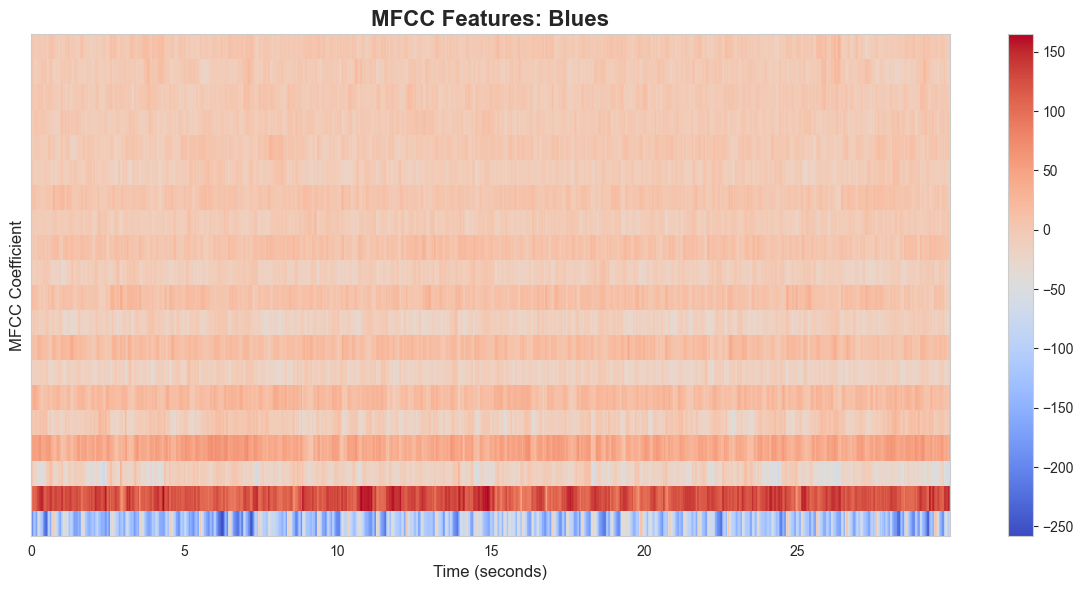


💡 What you're seeing:
   • X-axis: Time
   • Y-axis: 20 MFCC coefficients (1-20)
   • Color: Value of each coefficient over time
   • Each coefficient captures different aspects of timbre
   • Pattern shows how timbre changes throughout the song


In [ ]:
# ============================================
# CELL 3: Visualize MFCC Features
# ============================================

# Reload audio and compute MFCCs
audio, sr = librosa.load(sample_file, duration=30)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax, cmap='coolwarm')
fig.colorbar(img, ax=ax)
ax.set_title('MFCC Features: Blues', fontsize=16, fontweight='bold')
ax.set_ylabel('MFCC Coefficient', fontsize=12)
ax.set_xlabel('Time (seconds)', fontsize=12)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '03_mfcc_visualization.png', dpi=300, bbox_inches='tight')
print("✅ MFCC visualization saved")
plt.show()


print("   • X-axis: Time")
print("   • Y-axis: 20 MFCC coefficients (1-20)")
print("   • Color: Value of each coefficient over time")
print("   • Each coefficient captures different aspects of timbre")
print("   • Pattern shows how timbre changes throughout the song")

Why MFCCs are important:

Most powerful features for audio classification
Used in speech recognition too
Each coefficient captures different frequency bands
Together they represent the "texture" of sound

In [9]:
# ============================================
# CELL 4: Extract Features from Multiple Files
# ============================================

def extract_all_features(file_path):
    """
    Extract all audio features from a single file.
    Returns a dictionary of features.
    """
    # Load audio
    audio, sr = librosa.load(file_path, duration=30)
    
    features = {}
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc{i+1}_mean'] = np.mean(mfccs[i])
        features[f'mfcc{i+1}_var'] = np.var(mfccs[i])
    
    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    features['chroma_stft_mean'] = np.mean(chroma)
    features['chroma_stft_var'] = np.var(chroma)
    
    # Spectral features
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    features['spectral_centroid_var'] = np.var(spectral_centroid)
    
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    features['rolloff_mean'] = np.mean(spectral_rolloff)
    features['rolloff_var'] = np.var(spectral_rolloff)
    
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
    features['spectral_bandwidth_var'] = np.var(spectral_bandwidth)
    
    # Temporal features
    zcr = librosa.feature.zero_crossing_rate(audio)
    features['zero_crossing_rate_mean'] = np.mean(zcr)
    features['zero_crossing_rate_var'] = np.var(zcr)
    
    # Energy
    rms = librosa.feature.rms(y=audio)
    features['rms_mean'] = np.mean(rms)
    features['rms_var'] = np.var(rms)
    
    # Tempo (FASTER METHOD)
    try:
        onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
        features['tempo'] = tempo
    except:
        features['tempo'] = 120.0  # Default
    
    return features

# Extract features from first 5 files of each genre
print("🎵 Extracting features from sample files...")
print("="*60)

genres = ['blues', 'classical', 'metal', 'jazz']
all_features = []

for genre in genres:
    genre_path = AUDIO_DIR / genre
    audio_files = sorted(genre_path.glob('*.wav'))[:5]  # First 5 files
    
    print(f"\n📂 Processing {genre}...")
    for audio_file in audio_files:
        features = extract_all_features(audio_file)
        features['label'] = genre
        features['filename'] = audio_file.name
        all_features.append(features)
        print(f"   ✓ {audio_file.name}")

# Convert to DataFrame
df_features = pd.DataFrame(all_features)

print("\n" + "="*60)
print(f"✅ Feature extraction complete!")
print(f"   Total samples: {len(df_features)}")
print(f"   Features per sample: {len(df_features.columns) - 2}")  # -2 for label and filename
print("\nDataFrame preview:")
display(df_features.head())

🎵 Extracting features from sample files...

📂 Processing blues...
   ✓ blues.00000.wav
   ✓ blues.00001.wav
   ✓ blues.00002.wav
   ✓ blues.00003.wav
   ✓ blues.00004.wav

📂 Processing classical...
   ✓ classical.00000.wav
   ✓ classical.00001.wav
   ✓ classical.00002.wav
   ✓ classical.00003.wav
   ✓ classical.00004.wav

📂 Processing metal...
   ✓ metal.00000.wav
   ✓ metal.00001.wav
   ✓ metal.00002.wav
   ✓ metal.00003.wav
   ✓ metal.00004.wav

📂 Processing jazz...
   ✓ jazz.00000.wav
   ✓ jazz.00001.wav
   ✓ jazz.00002.wav
   ✓ jazz.00003.wav
   ✓ jazz.00004.wav

✅ Feature extraction complete!
   Total samples: 20
   Features per sample: 53

DataFrame preview:


,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,zero_crossing_rate_mean,zero_crossing_rate_var,rms_mean,rms_var,tempo,label,filename
0,-113.619385,2570.812744,121.553017,295.724426,-19.151056,235.579819,42.345768,150.835358,-6.371168,168.024643,...,9.013297e+05,2002.657106,85829.345908,0.083066,0.000767,0.130192,0.002830,123.046875,blues,blues.00000.wav
1,-207.581512,7770.772461,123.997147,560.163025,8.939115,572.700073,35.870758,264.855316,2.919970,280.047485,...,2.976792e+06,2038.612143,213889.873843,0.056044,0.001449,0.095892,0.002374,107.666016,blues,blues.00001.wav
2,-90.776344,3319.793457,140.448608,509.112091,-29.100559,411.987000,31.687340,144.147659,-13.975973,156.015594,...,7.829465e+05,1747.382028,76150.688778,0.076301,0.001007,0.175494,0.002753,161.499023,blues,blues.00002.wav
3,-199.462006,5495.972168,150.094727,456.566650,5.649167,257.047211,26.870144,158.197784,1.755441,267.902130,...,1.494194e+06,1596.244204,166637.568438,0.033309,0.000423,0.141139,0.006340,172.265625,blues,blues.00003.wav
4,-160.291855,5198.144531,126.195763,853.737915,-35.602501,333.711761,22.151169,193.673309,-32.487640,336.451080,...,1.572133e+06,1748.367477,88460.061228,0.101500,0.001954,0.091540,0.002305,135.999178,blues,blues.00004.wav


What this function does:

Takes an audio file path
Loads the audio
Extracts ALL features we talked about
Returns them as a dictionary
We then extract features from 5 files per genre (20 total)

Why only 5 files:

Feature extraction is SLOW (takes time)
Just demonstrating the process
The CSV already has all 1000 files done for us!

✅ Feature comparison saved


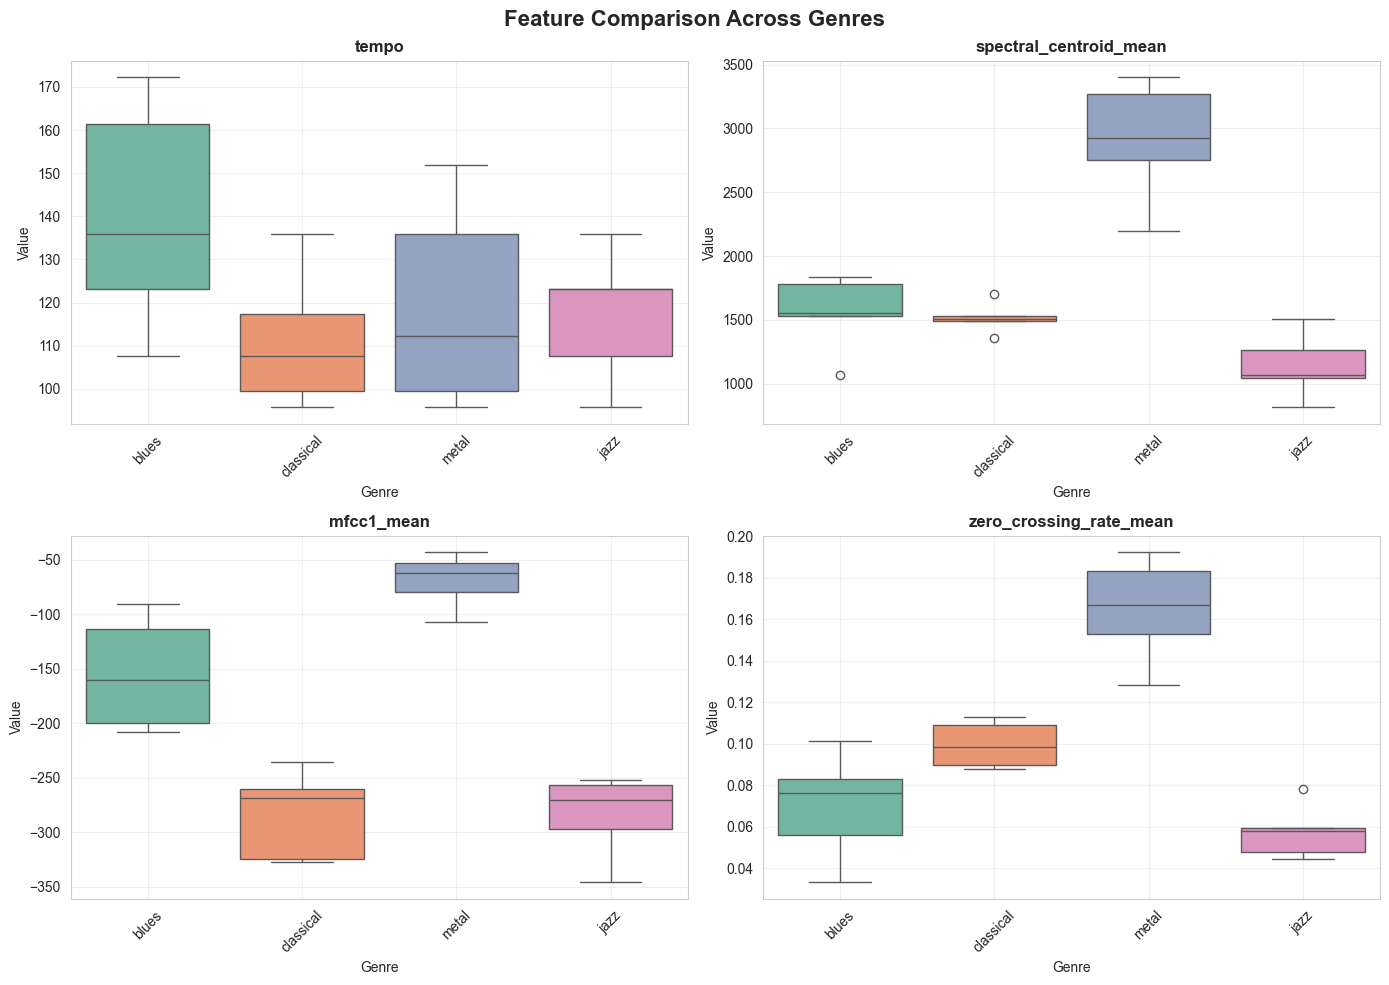


💡 Observations:
   • Tempo: Metal and jazz tend to be faster
   • Spectral Centroid: Classical is brighter (higher frequencies)
   • MFCC1: Different timbres have different first MFCC values
   • Zero Crossing Rate: Metal is noisier (more zero crossings)

✅ These differences allow ML to classify genres!


In [10]:
# ============================================
# CELL 5: Compare Feature Distributions
# ============================================

# Select a few interesting features to compare
features_to_plot = ['tempo', 'spectral_centroid_mean', 'mfcc1_mean', 'zero_crossing_rate_mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    sns.boxplot(data=df_features, x='label', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Genre', fontsize=10)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Comparison Across Genres', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(RESULTS_DIR / '03_feature_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Feature comparison saved")
plt.show()

print("\n💡 Observations:")
print("   • Tempo: Metal and jazz tend to be faster")
print("   • Spectral Centroid: Classical is brighter (higher frequencies)")
print("   • MFCC1: Different timbres have different first MFCC values")
print("   • Zero Crossing Rate: Metal is noisier (more zero crossings)")
print("\n✅ These differences allow ML to classify genres!")

What boxplots show:

Box = middle 50% of data (25th to 75th percentile)
Line in box = median (middle value)
Whiskers = range of data
Dots = outliers

What to look for:

Do genres have different median values?
Do boxes overlap or separate?
Separated boxes = easy to classify!
Overlapping boxes = harder to classify

In [11]:
# ============================================
# CELL 6: Summary
# ============================================

print("="*60)
print("✅ FEATURE EXTRACTION COMPLETE")
print("="*60)

print("\n📊 What We Learned:")
print("  ✓ MFCCs capture timbre (most important!)")
print("  ✓ Chroma captures musical notes/harmony")
print("  ✓ Spectral features capture brightness/frequency distribution")
print("  ✓ Temporal features capture rhythm/noisiness")
print("  ✓ Different genres have different feature distributions")

print("\n📁 Saved Visualizations:")
print(f"  → {RESULTS_DIR / '03_mfcc_visualization.png'}")
print(f"  → {RESULTS_DIR / '03_feature_comparison.png'}")

print("\n🎯 Next Steps:")
print("  1. Create 04_baseline_models.ipynb")
print("  2. Use pre-extracted features from CSV")
print("  3. Train classification models:")
print("     • Random Forest")
print("     • Support Vector Machine (SVM)")
print("     • K-Nearest Neighbors (KNN)")
print("  4. Evaluate and compare model performance")

print("\n💡 Key Insight:")
print("  Features convert audio (waveforms) into numbers that ML can use!")
print("  Different genres = different feature patterns = ML can learn!")

✅ FEATURE EXTRACTION COMPLETE

📊 What We Learned:
  ✓ MFCCs capture timbre (most important!)
  ✓ Chroma captures musical notes/harmony
  ✓ Spectral features capture brightness/frequency distribution
  ✓ Temporal features capture rhythm/noisiness
  ✓ Different genres have different feature distributions

📁 Saved Visualizations:
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/03_mfcc_visualization.png
  → /Users/erfanesfahanian/Desktop/audio pattern project/results/figures/03_feature_comparison.png

🎯 Next Steps:
  1. Create 04_baseline_models.ipynb
  2. Use pre-extracted features from CSV
  3. Train classification models:
     • Random Forest
     • Support Vector Machine (SVM)
     • K-Nearest Neighbors (KNN)
  4. Evaluate and compare model performance

💡 Key Insight:
  Features convert audio (waveforms) into numbers that ML can use!
  Different genres = different feature patterns = ML can learn!
